The following come from a talk by Jonathan Whitmore at OSCON 2015:

https://svds.com/jupyter-notebook-best-practices-for-data-science/

# Title

## Notebook Description
  * Include all questions being pursued.
  * Mark those that were dead ends, but keep them in the notebook.

## Start with imports
  - Magics
  - In alphabetical order of each subgroup:
    - Standard Library
    - Third Party Libraries
    - Local Libraries

In [1]:
# The server works best if magics happen first
%matplotlib inline
### It is considered better practice to use %matplotlib instead of %pylab, as %pylab
### also automatically imports a number of things into the namespace, which can cause
### pollution and conflicts.

# https://ipython.org/ipython-doc/dev/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 1
### There are a number of modes in autoreload:
###     0: Disable
###     1: Only reload explicit modules (those imported with %aimport) every time they are called
###     2: Reload all modules every time they are called
###
### Personally, I'm not such a fan of this idea, but I'm leaving it here to test its functionality.

# https://github.com/jrjohansson/version_information
# pip install version_information
%load_ext version_information
%version_information numpy,scipy,pandas,matplotlib,spacepy
### Will display Python, IPython, and OS versions by default. Follow with comma separated list of
### any relevant packages you would like displayed.

This unreleased version of SpacePy is not supported by the SpacePy team.


Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.1.0
OS Darwin 15.6.0 x86_64 i386 64bit
numpy 1.11.2
scipy 0.18.1
pandas 0.19.0
matplotlib 1.5.3
spacepy UNRELEASED
Thu Oct 13 12:47:33 2016 MDT

In [2]:
# Standard Library
import os
import sys
import time

# Third Party Libraries
from IPython.display import FileLink
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Local Libraries
gold = 8.*np.array([1,1/((1+np.sqrt(5))/2)])

def fix_boxplot(parts):
    for m in parts['fliers']:
        m.set_markersize(12)
        m.set_markeredgewidth(1)
    for b in parts['boxes']:
        b.set_linewidth(2)
    for w in parts['whiskers']:
        w.set_linewidth(2)
    for c in parts['caps']:
        c.set_linewidth(2)
    for m in parts['medians']:
        m.set_linewidth(2)
    for m in parts['means']:
        m.set_linewidth(2)
        m.set_color('g')
        m.set_markerfacecolor('g')

In [3]:
# Do any interface customizations next
sns.set()
plt.rcParams['figure.figsize'] = gold
%config InlineBackend.figure_format='retina'

In [4]:
# Establish any path needs here
sys.path.append("./src/")
fig_prefix = "./figures/{d.tm_year:04d}-{d.tm_mon:02d}-{d.tm_mday:02d}-dko-"
### He's actually using a filename convention of <notebook id>-<developer>-<description>, where his
### notebook id is the current date.

## Actual Work
From here, start doing the notebook work.

It's helpful to keep notebooks short, and so it's a good idea to link back to previous work.

In [5]:
FileLink("./3.1 Single Variable Visualization.ipynb")

/Users/dolson/research/Bayes/ITBS_2e/3.1 Single Variable Visualization.ipynb

## Saving Figures
It's not a bad idea to save a hard copy of the inline figures as you go.

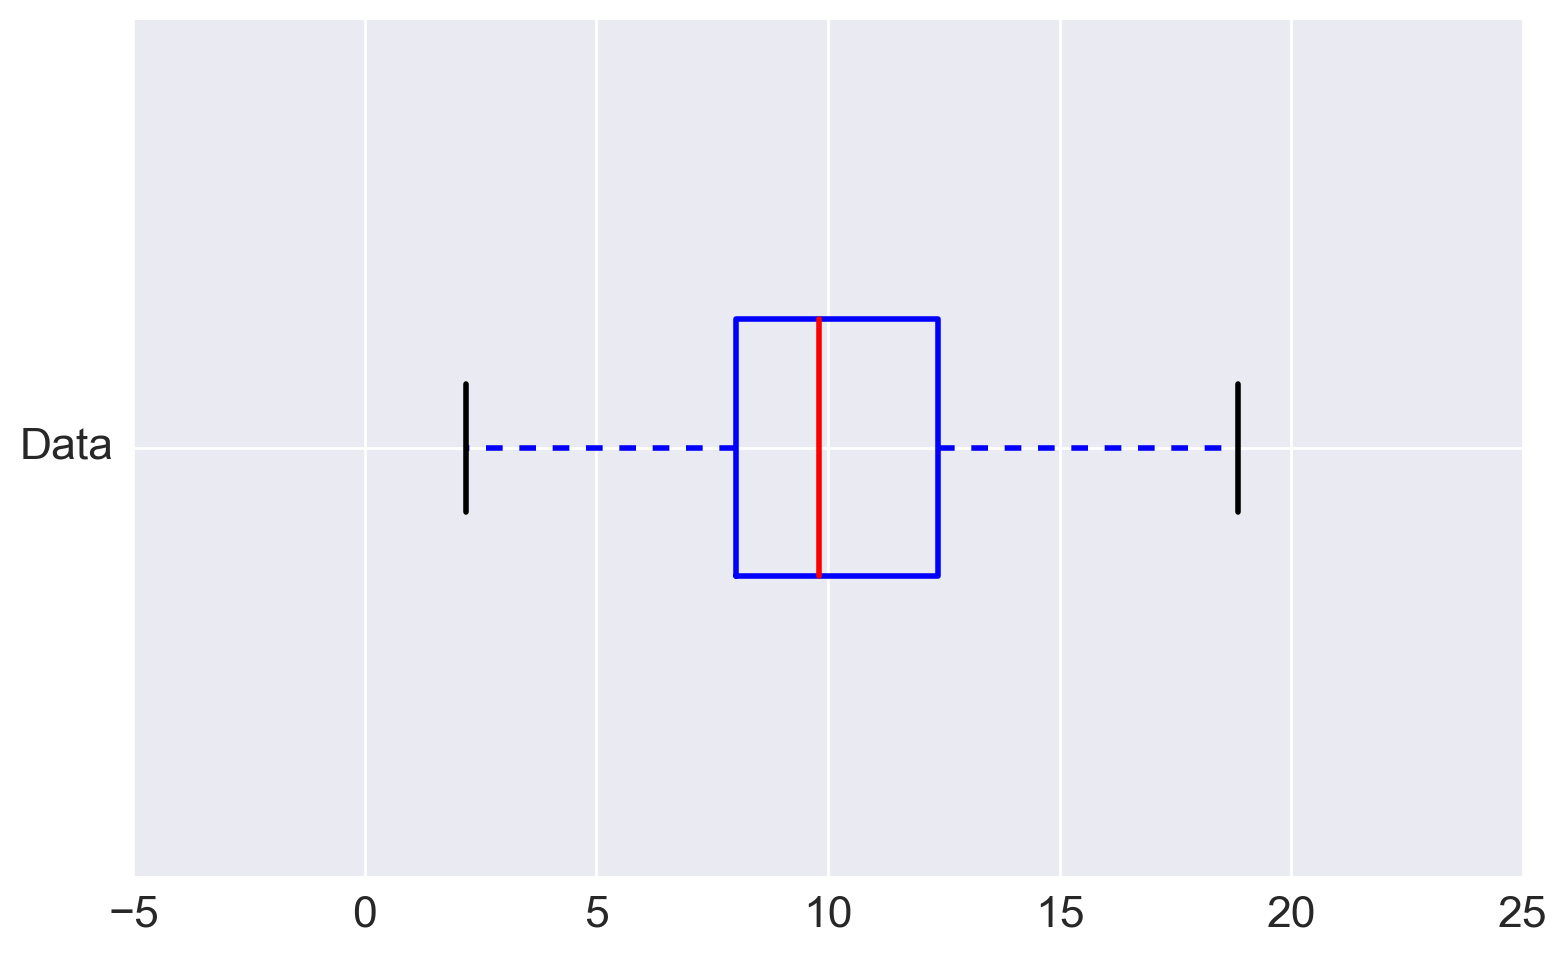

In [6]:
data = np.random.normal(10,3,size=200)
parts = plt.boxplot(data,vert=False,labels=['Data'])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axis([-5,25,0.75,1.25])
fix_boxplot(parts)

plt.tight_layout()
plt.savefig(fig_prefix.format(d=time.localtime()) + "jupyter-best-practices.png")

# Appendix

## Organizing Directories
  * data: backed up outside of version control
  * deliver: final polished notebooks for consumption
  * develop: lab notebooks here
  * figures: save all notebook figures independently here
  * src: local scripts and modules

## Notebook File Formats
It's useful to have .html and .py formats of your work independently. This can be done automatically by changing the jupyter config file.